In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df_raw = pd.read_csv('profiles.csv')


In [3]:
df = df_raw

In [4]:
print(len(df))

59946


In [5]:
#df.height

In [6]:
print(df.dtypes)

age              int64
body_type       object
diet            object
drinks          object
drugs           object
education       object
essay0          object
essay1          object
essay2          object
essay3          object
essay4          object
essay5          object
essay6          object
essay7          object
essay8          object
essay9          object
ethnicity       object
height         float64
income           int64
job             object
last_online     object
location        object
offspring       object
orientation     object
pets            object
religion        object
sex             object
sign            object
smokes          object
speaks          object
status          object
dtype: object


## Filling NaN with values

In [7]:
#Count of NaN values
df.isna().sum()

age                0
body_type       5296
diet           24395
drinks          2985
drugs          14080
education       6628
essay0          5488
essay1          7572
essay2          9638
essay3         11476
essay4         10537
essay5         10850
essay6         13771
essay7         12451
essay8         19225
essay9         12603
ethnicity       5680
height             3
income             0
job             8198
last_online        0
location           0
offspring      35561
orientation        0
pets           19921
religion       20226
sex                0
sign           11056
smokes          5512
speaks            50
status             0
dtype: int64

In [8]:
#Sets NaN height values to mean
df.height = df.height.fillna(round(df.height.mean(),1))


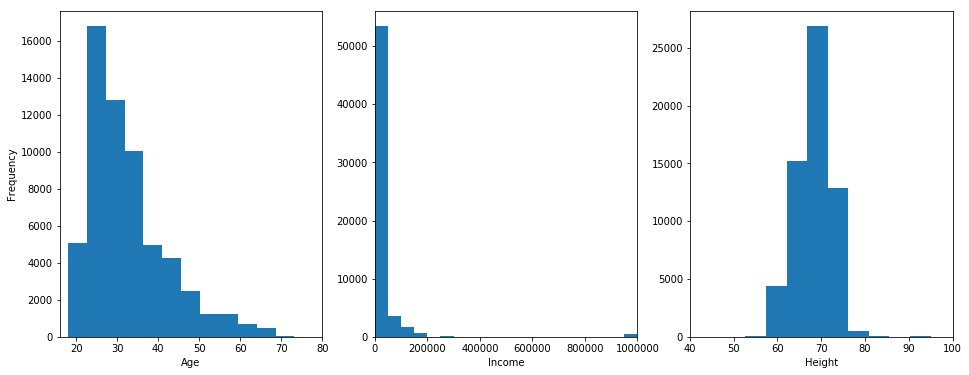

In [9]:
plt.figure(figsize=(16, 6))
plt.subplot(131)
plt.hist(df.age, bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.subplot(132)
plt.hist(df.income, bins=20)
plt.xlabel("Income")
plt.xlim(0, 1000000)
plt.subplot(133)
plt.hist(df.height, bins=20)
plt.xlabel("Height")
plt.xlim(40, 100)
plt.show()

In [10]:
df.body_type = df.body_type.fillna("rather not say")

In [11]:
df.body_type.value_counts()

average           14652
fit               12711
athletic          11819
rather not say     5494
thin               4711
curvy              3924
a little extra     2629
skinny             1777
full figured       1009
overweight          444
jacked              421
used up             355
Name: body_type, dtype: int64

In [12]:
df.diet.value_counts()

mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [13]:
nan_answer = "rather not say"
df.diet = df.diet.fillna(nan_answer)
df.drinks = df.drinks.fillna(nan_answer)
df.drugs = df.drugs.fillna(nan_answer)
df.education = df.education.fillna(nan_answer)
df.ethnicity = df.ethnicity.fillna(nan_answer)
df.job = df.job.fillna(nan_answer)
df.offspring = df.offspring.fillna(nan_answer)
df.pets = df.pets.fillna(nan_answer)
df.religion = df.religion.fillna(nan_answer)
df.sign = df.sign.fillna(nan_answer)
df.smokes = df.smokes.fillna(nan_answer)
df.speaks = df.speaks.fillna(nan_answer)

In [14]:
df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']] = df[['essay0', 'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7', 'essay8', 'essay9']].fillna(" ")

In [15]:
df.isna().sum()

age            0
body_type      0
diet           0
drinks         0
drugs          0
education      0
essay0         0
essay1         0
essay2         0
essay3         0
essay4         0
essay5         0
essay6         0
essay7         0
essay8         0
essay9         0
ethnicity      0
height         0
income         0
job            0
last_online    0
location       0
offspring      0
orientation    0
pets           0
religion       0
sex            0
sign           0
smokes         0
speaks         0
status         0
dtype: int64

## Mapping values 

In [16]:
df['age_segment'] = pd.cut(df['age'], [0, 18, 23, 29, 39, 49, 59, 69, 120], labels=['0-18', 
                                                                                    '19-23', 
                                                                                    '24-29', 
                                                                                    '30-39', 
                                                                                    '40-49', 
                                                                                    '50-59', 
                                                                                    '60-69', 
                                                                                    '70 and above'])

#print(df.age_segment.value_counts())

age_segment_map = {
    "0-18": 0,
    "19-23": 1,
    "24-29": 2,
    "30-39": 3,    
    "40-49": 4,
    "50-59": 5,
    "60-69": 6,
    "70 and above": 7
}

df["age_segment_code"] = df.age_segment.map(age_segment_map)

In [17]:
body_type_mapping = {nan_answer: 0, 
                     "skinny": 1, 
                     "thin": 1, 
                     "average": 2, 
                     "curvy": 2, 
                     "a little extra": 3, 
                     "full figured": 3, 
                     "overweight": 3, 
                     "used up": 3, 
                     "fit": 4, 
                     "athletic": 4, 
                     "jacked": 4}
                                         
df["body_type_code"] = df.body_type.map(body_type_mapping)

In [18]:
df.body_type_code.value_counts()

4    24951
2    18576
1     6488
0     5494
3     4437
Name: body_type_code, dtype: int64

In [19]:
df.diet.value_counts()

rather not say         24395
mostly anything        16585
anything                6183
strictly anything       5113
mostly vegetarian       3444
mostly other            1007
strictly vegetarian      875
vegetarian               667
strictly other           452
mostly vegan             338
other                    331
strictly vegan           228
vegan                    136
mostly kosher             86
mostly halal              48
strictly halal            18
strictly kosher           18
kosher                    11
halal                     11
Name: diet, dtype: int64

In [20]:
diet_strictness = lambda strictness: "strict" if "strictly" in strictness else "non-strict"

In [21]:
df["diet_strictness"] = df["diet"].apply(diet_strictness)

In [22]:
#df.diet_strictness_code.value_counts()

In [23]:
diet_type = lambda diettype: diettype.split(' ')[-1] if diettype != "rather not say" else "rather not say"

In [24]:
df["diet_type"] = df["diet"].apply(diet_type)

In [25]:
diet_segment_map = {"rather not say": "rather not say",
                    "anything": "anything",
                    "other" : "other",
                    "vegetarian": "veggie",
                    "vegan": "veggie",
                    "kosher": "religous",
                    "halal": "religous",
                   }

df["diet_type"] = df.diet_type.map(diet_segment_map)

In [216]:
df.smokes.value_counts()

no                43896
rather not say     5512
sometimes          3787
when drinking      3040
yes                2231
trying to quit     1480
Name: smokes, dtype: int64

In [27]:
diet_strictness_mapping = {"non-strict": 1, "strict": 2}
df["diet_strictness_code"] = df.diet_strictness.map(diet_strictness_mapping)

In [28]:
diet_type_code_map = {"rather not say": 0, 
                      "anything": 1,
                      "veggie": 2,
                      "religous" : 3,
                      "other": 4
                     }
df["diet_type_code"] = df.diet_type.map(diet_type_code_map)

In [29]:
df.diet_type_code.value_counts()

1    27881
0    24395
2     5688
4     1790
3      192
Name: diet_type_code, dtype: int64

In [30]:
#df.drugs_code.value_counts()

In [31]:
drink_mapping = {"rather not say": 0,
                 "not at all": 1, 
                 "rarely": 2, 
                 "socially": 3, 
                 "often": 4, 
                 "very often": 5, 
                 "desperately": 6}
df["drinks_code"] = df.drinks.map(drink_mapping)

In [32]:
smokes_mapping = {"rather not say": 0,
                 "no": 1, 
                 "when drinking": 2, 
                 "sometimes": 3, 
                 "trying to quit": 4, 
                 "yes": 5, 
                 }
df["smokes_code"] = df.smokes.map(smokes_mapping)

In [33]:
drugs_mapping = {"rather not say": 0,
                 "never": 1, 
                 "sometimes": 2, 
                 "often": 3, 
                 }
df["drugs_code"] = df.drugs.map(drugs_mapping)

In [34]:
#df.education_status_code.value_counts()

In [35]:
def education_classification(edu_string):
    status = ""
    level = ""
    if "rather" in edu_string:
        status = "rather not say"
        level = "rather not say"
    elif "working" in edu_string:
        status = "working"
    elif "dropped" in edu_string:
        status = "drop-out"
    else:
        status = "graduated"
    if "college" in edu_string or "university" in edu_string or "master" in edu_string or "ph.d" in edu_string or "law" in edu_string or "med" in edu_string:
        level = "high education"
    elif "high school" in edu_string or "space" in edu_string:
        level = "low education"
    return pd.Series([status, level])

In [36]:
education_classification("dropped out of two-year college")

0          drop-out
1    high education
dtype: object

In [37]:
df[['education_status','education_level']] = df.apply(lambda row: education_classification(row['education']), axis=1)

In [38]:
education_level_mapping = {"rather not say": 0,
                           "low education": 1,
                           "high education": 2, 
                          }
df["education_level_code"] = df.education_level.map(education_level_mapping)

In [39]:
education_status_mapping = {"rather not say": 0,
                            "drop-out": 1,
                            "working": 2,
                            "graduated" : 3,
                          } 
df["education_status_code"] = df.education_status.map(education_status_mapping)

In [40]:
#df.job_segment.value_counts()

In [41]:
def job_classification(jobtext):
    job = ""
    if "rather" in jobtext:
        job = "rather not say"
    elif "other" in jobtext or "military" in jobtext:
        job = "other"
    elif "student" in jobtext:
        job = "student"
    elif "unemployed" in jobtext:
        job = "unemployed"
    elif "retired" in jobtext:
        job = "retired"
    else:
        job = "employed"
    return job

In [42]:
df['job_segment'] = df.apply(lambda row: job_classification(row['job']), axis=1)

In [43]:
job_segment_mapping = {"rather not say": 0,
                       "employed": 1,
                       "student": 2,
                       "retired": 3,
                       "unemployed": 4,
                       "other": 5,
                       } 
df["job_segment_code"] = df.job_segment.map(job_segment_mapping)

In [44]:
def kids_classification(kidstext):
    kidstext_first = kidstext.split(' ')[0]
    kids = ""
    kidscode = 0
    if kidstext_first == "rather":
        kids = "rather not say"
        kidscode = 0
    elif kidstext_first == "has":
        kids = "yes"
        kidscode = 1
    else:
        kids = "no"
        kidscode = 2
    return pd.Series([kids, kidscode])

In [45]:
df[['kids_segment','kids_segment_code']] = df.apply(lambda row: kids_classification(row['offspring']), axis=1)

In [46]:
df.kids_segment.value_counts()

rather not say    35561
no                19466
yes                4919
Name: kids_segment, dtype: int64

In [47]:
#df.orientation_code.value_counts()

In [48]:
orientation_mapping = {"straight": 1, 
                       "gay": 2,
                       "bisexual": 3
                      }
df["orientation_code"] = df.orientation.map(orientation_mapping)

In [49]:
#df.pets.value_counts()

In [50]:
def pets_classification(petstext):
    petstext_first = petstext.split(' ')[0]
    pets = ""
    petscode = 0
    if petstext_first == "rather":
        pets = "rather not say"
        petscode = 0
    elif petstext_first == "has":
        pets = "yes"
        petscode = 1
    else:
        pets = "no"
        petscode = 2
    return pd.Series([pets, petscode])
    

In [51]:
df[['pets_segment','pets_segment_code']] = df.apply(lambda row: pets_classification(row['pets']), axis=1)

In [52]:
#df.religion_segment_code.value_counts()

In [53]:
def religion_classification(rel_text):
    reltext_first = rel_text.split(' ')[0]
    religion = ""
    religion_code = 0
    if reltext_first == "rather":
        religion = "rather not say"
        religion_code = 0
    elif reltext_first == "agnosticism":
        religion = "agnosticism"
        religion_code = 1
    elif reltext_first == "atheism":
        religion = "atheism"
        religion_code = 2
    elif reltext_first == "christianity":
        religion = "christianity"
        religion_code = 3
    elif reltext_first == "catholicism":
        religion = "catholicism"
        religion_code = 4
    elif reltext_first == "judaism":
        religion = "judaism"
        religion_code = 5
    elif reltext_first == "buddhism":
        religion = "buddhism"
        religion_code = 6
    elif reltext_first == "hinduism":
        religion = "hinduism"
        religion_code = 7
    elif reltext_first == "islam":
        religion = "islam"
        religion_code = 8
    else:
        religion = "other"
        petscode = 9
    return pd.Series([religion, religion_code])
    
    

In [54]:
df[['religion_segment','religion_segment_code']] = df.apply(lambda row: religion_classification(row['religion']), axis=1)

In [55]:
df.sex.value_counts()

m    35829
f    24117
Name: sex, dtype: int64

In [56]:
df["sex_code"] = df.sex.map({"m": 1, "f": 2})

In [57]:
#df.sign_code.value_counts()

In [58]:
sign_mapping = lambda sign: sign.split(' ')[0] if not sign=="rather not say" else "rather not say"

In [59]:
df["sign_segment"] = df["sign"].astype(str).apply(sign_mapping)

In [60]:
def valuemapping(values_to_map):
    values = values_to_map.unique()
    mapping = {}
    shift = 0
    for i, value in enumerate(values, 1):
        mapping[value] = i - shift
        if value == "rather not say":
            mapping[value] = 0
            shift = 1        
    return mapping  

In [61]:
sign_mapping = valuemapping(df.sign_segment)
print(sign_mapping)
df["sign_code"] = df.sign_segment.map(sign_mapping)

{'gemini': 1, 'cancer': 2, 'pisces': 3, 'aquarius': 4, 'taurus': 5, 'virgo': 6, 'sagittarius': 7, 'leo': 8, 'rather not say': 0, 'aries': 9, 'libra': 10, 'scorpio': 11, 'capricorn': 12}


In [215]:
df.sign_code.value_counts()

0     11056
8      4374
1      4310
10     4207
2      4206
6      4141
5      4140
11     4134
9      3989
3      3946
7      3942
4      3928
12     3573
Name: sign_code, dtype: int64

In [62]:
#df.status_code.value_counts()

In [63]:
status_mapping = valuemapping(df.status)
df["status_code"] = df.status.map(status_mapping)

In [64]:
print(df.dtypes)

age                         int64
body_type                  object
diet                       object
drinks                     object
drugs                      object
education                  object
essay0                     object
essay1                     object
essay2                     object
essay3                     object
essay4                     object
essay5                     object
essay6                     object
essay7                     object
essay8                     object
essay9                     object
ethnicity                  object
height                    float64
income                      int64
job                        object
last_online                object
location                   object
offspring                  object
orientation                object
pets                       object
religion                   object
sex                        object
sign                       object
smokes                     object
speaks        

In [65]:
def essayanalysis(text):
    text = text.replace("<br />", ' ')
    text = text.replace("\n", ' ')
    for char in '-.,:?/+!':
        text=text.replace(char,' ')
    text = text.lower()
    word_list = text.split()
    #print(word_list)
    text_length = len(word_list)
    wordlength = []
    imecount = 0
    iwords = ["i", "i'm", "me"]
    for word in word_list:
        wordlength.append(len(word))
        if word in iwords:
            imecount +=1
            #print(word)
    if len(word_list) != 0:
        avgwordlength = sum(wordlength) / len(word_list)
    else:
        avgwordlength = 0
    #return text_length#, avgwordlength, imecount
    return pd.Series([text_length, avgwordlength, imecount])

In [66]:
essay_selection = 'all'
if essay_selection == 'all':
    df[['text_length','avg_word_length', 'i_me_count']] = df.apply(lambda row: essayanalysis(row['essay0'] + ' ' 
                                                                                             + row['essay1'] + ' ' 
                                                                                             + row['essay2'] + ' ' 
                                                                                             + row['essay3'] + ' ' 
                                                                                             + row['essay4'] + ' ' 
                                                                                             + row['essay5'] + ' ' 
                                                                                             + row['essay6'] + ' ' 
                                                                                             + row['essay7'] + ' ' 
                                                                                             + row['essay8'] + ' ' 
                                                                                             + row['essay9']), axis=1)
elif essay_selection == 'first4':
    df[['text_length','avg_word_length', 'i_me_count']] = df.apply(lambda row: essayanalysis(row['essay0'] + ' ' 
                                                                                             + row['essay1'] + ' ' 
                                                                                             + row['essay2'] + ' ' 
                                                                                             + row['essay3']), axis=1)
elif essay_selection == 'first1':
    df[['text_length','avg_word_length', 'i_me_count']] = df.apply(lambda row: essayanalysis(row['essay0']), axis=1)
    

In [67]:
df['i_me_frequency'] = df.apply((lambda row: row['i_me_count']/row['text_length'] if row['text_length'] != 0 
                                 else 0), axis=1)

In [68]:
df.corr()

,age,height,income,age_segment_code,body_type_code,diet_strictness_code,diet_type_code,drinks_code,smokes_code,drugs_code,...,orientation_code,pets_segment_code,religion_segment_code,sex_code,sign_code,status_code,text_length,avg_word_length,i_me_count,i_me_frequency
age,1.000000,-0.022261,-0.001004,0.954291,0.073452,-0.088278,-0.017179,-0.069625,-0.099990,-0.039432,...,-0.062062,0.017658,0.039176,0.041481,-0.000621,-0.019273,0.084697,-0.002679,0.047500,-0.060695
height,-0.022261,1.000000,0.065049,-0.015299,0.154441,0.048581,-0.009926,0.017491,0.028982,0.010130,...,-0.060390,-0.014121,-0.055109,-0.655432,-0.042157,-0.004783,0.005464,0.003960,-0.025343,-0.052468
income,-0.001004,0.065049,1.000000,-0.000756,0.041570,0.044898,0.047049,0.041435,0.038428,0.056074,...,-0.003397,0.034130,0.011486,-0.074601,0.010958,0.013096,0.007456,0.003995,-0.002128,-0.012062
age_segment_code,0.954291,-0.015299,-0.000756,1.000000,0.074256,-0.083110,-0.022597,-0.057467,-0.107474,-0.051103,...,-0.070650,0.020607,0.034954,0.033039,-0.001844,-0.015651,0.092834,0.000365,0.054522,-0.062382
body_type_code,0.073452,0.154441,0.041570,0.074256,1.000000,0.027561,0.090063,0.028542,-0.053882,-0.013487,...,-0.067904,0.009540,0.007765,-0.196917,0.001759,-0.082319,-0.015213,0.000777,-0.023994,-0.022655
diet_strictness_code,-0.088278,0.048581,0.044898,-0.083110,0.027561,1.000000,0.245414,0.057837,0.036285,0.025515,...,0.009107,0.072153,-0.000223,-0.049340,0.009952,0.010451,0.060356,0.020328,0.043770,-0.015967
diet_type_code,-0.017179,-0.009926,0.047049,-0.022597,0.090063,0.245414,1.000000,0.033308,0.032994,0.029611,...,0.019662,0.111456,0.045601,0.033537,0.051212,-0.022408,0.058964,0.009534,0.046325,-0.016490
drinks_code,-0.069625,0.017491,0.041435,-0.057467,0.028542,0.057837,0.033308,1.000000,0.193725,0.108036,...,-0.004223,0.103184,0.037869,0.004324,0.063545,0.013083,0.030395,0.012158,0.026461,0.000344
smokes_code,-0.099990,0.028982,0.038428,-0.107474,-0.053882,0.036285,0.032994,0.193725,1.000000,0.201836,...,0.075215,0.059704,0.012797,-0.030984,0.076599,0.015107,-0.019736,-0.009342,-0.008798,0.023617
drugs_code,-0.039432,0.010130,0.056074,-0.051103,-0.013487,0.025515,0.029611,0.108036,0.201836,1.000000,...,0.054849,0.028297,0.042105,-0.015948,0.029077,0.040071,-0.015871,-0.013573,-0.002039,0.022593


In [69]:
df_codes = df[["age", "height", "income", "age_segment_code", "body_type_code", "diet_strictness_code", "diet_type_code", "drinks_code", "smokes_code", "drugs_code", "education_level_code", "education_status_code", "job_segment_code", "kids_segment_code", "orientation_code", "pets_segment_code", "religion_segment_code", "sex_code", "sign_code", "status_code", "text_length", "avg_word_length", "i_me_frequency"]]


In [70]:
df_codes.corr()

,age,height,income,age_segment_code,body_type_code,diet_strictness_code,diet_type_code,drinks_code,smokes_code,drugs_code,...,kids_segment_code,orientation_code,pets_segment_code,religion_segment_code,sex_code,sign_code,status_code,text_length,avg_word_length,i_me_frequency
age,1.000000,-0.022261,-0.001004,0.954291,0.073452,-0.088278,-0.017179,-0.069625,-0.099990,-0.039432,...,0.041466,-0.062062,0.017658,0.039176,0.041481,-0.000621,-0.019273,0.084697,-0.002679,-0.060695
height,-0.022261,1.000000,0.065049,-0.015299,0.154441,0.048581,-0.009926,0.017491,0.028982,0.010130,...,-0.024550,-0.060390,-0.014121,-0.055109,-0.655432,-0.042157,-0.004783,0.005464,0.003960,-0.052468
income,-0.001004,0.065049,1.000000,-0.000756,0.041570,0.044898,0.047049,0.041435,0.038428,0.056074,...,0.016708,-0.003397,0.034130,0.011486,-0.074601,0.010958,0.013096,0.007456,0.003995,-0.012062
age_segment_code,0.954291,-0.015299,-0.000756,1.000000,0.074256,-0.083110,-0.022597,-0.057467,-0.107474,-0.051103,...,0.034375,-0.070650,0.020607,0.034954,0.033039,-0.001844,-0.015651,0.092834,0.000365,-0.062382
body_type_code,0.073452,0.154441,0.041570,0.074256,1.000000,0.027561,0.090063,0.028542,-0.053882,-0.013487,...,0.039566,-0.067904,0.009540,0.007765,-0.196917,0.001759,-0.082319,-0.015213,0.000777,-0.022655
diet_strictness_code,-0.088278,0.048581,0.044898,-0.083110,0.027561,1.000000,0.245414,0.057837,0.036285,0.025515,...,0.057780,0.009107,0.072153,-0.000223,-0.049340,0.009952,0.010451,0.060356,0.020328,-0.015967
diet_type_code,-0.017179,-0.009926,0.047049,-0.022597,0.090063,0.245414,1.000000,0.033308,0.032994,0.029611,...,0.185124,0.019662,0.111456,0.045601,0.033537,0.051212,-0.022408,0.058964,0.009534,-0.016490
drinks_code,-0.069625,0.017491,0.041435,-0.057467,0.028542,0.057837,0.033308,1.000000,0.193725,0.108036,...,0.044212,-0.004223,0.103184,0.037869,0.004324,0.063545,0.013083,0.030395,0.012158,0.000344
smokes_code,-0.099990,0.028982,0.038428,-0.107474,-0.053882,0.036285,0.032994,0.193725,1.000000,0.201836,...,0.039383,0.075215,0.059704,0.012797,-0.030984,0.076599,0.015107,-0.019736,-0.009342,0.023617
drugs_code,-0.039432,0.010130,0.056074,-0.051103,-0.013487,0.025515,0.029611,0.108036,0.201836,1.000000,...,0.038959,0.054849,0.028297,0.042105,-0.015948,0.029077,0.040071,-0.015871,-0.013573,0.022593


In [71]:
df_codes.sign_code.value_counts()

0     11056
8      4374
1      4310
10     4207
2      4206
6      4141
5      4140
11     4134
9      3989
3      3946
7      3942
4      3928
12     3573
Name: sign_code, dtype: int64

In [72]:
len(df_codes)

59946

# Machine Learning

### Classification

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.svm import SVC
from sklearn import metrics

In [74]:
def normalize_data(feature_data):
    x = feature_data.values.astype('float64')
    min_max_scaler = preprocessing.MinMaxScaler()
    x_scaled = min_max_scaler.fit_transform(x)
    feature_data = pd.DataFrame(x_scaled, columns=feature_data.columns)
    return feature_data

In [75]:
def knn(prediction_data, prediction_target, maxk, avg):
    training_data, validation_data, training_labels, validation_labels = train_test_split(prediction_data, prediction_target, test_size = 0.2, random_state = 100)
    #print(len(training_data), len(training_labels))
    #print(len(validation_data), len(validation_labels))
    k_list = []
    accuracies = []
    recalls = []
    precisions = []
    f1s = []
    for k in range(1, maxk, 2):
        classifier = KNeighborsClassifier(n_neighbors = k)
        classifier.fit(training_data, training_labels)
        print(k, ': ', classifier.score(validation_data, validation_labels))
        k_list.append(k)
        y_predict = classifier.predict(validation_data)
        accuracies.append(metrics.accuracy_score(validation_labels, y_predict))
        recalls.append(metrics.recall_score(validation_labels, y_predict, average=avg))
        precisions.append(metrics.precision_score(validation_labels, y_predict, average=avg))
        f1s.append(metrics.f1_score(validation_labels, y_predict, average=avg))
    return k_list, y_predict, accuracies, recalls, precisions, f1s

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples. The best value is 1 and the worst value is 0.

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative. The best value is 1 and the worst value is 0.

The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:

F1 = 2 * (precision * recall) / (precision + recall)


In [76]:
sign_prediction_data = df_codes[df_codes["sign_code"] > 0]

In [77]:
#len(sign_prediction_data)

In [78]:
#sign_prediction_data.sign_code.value_counts()

In [79]:
#sign_prediction_data = normalize_data(sign_prediction_data)
#remove hash for normalization

In [80]:
sign_prediction_features = sign_prediction_data.drop(["sign_code"], axis=1)
sign_prediction_labels = sign_prediction_data["sign_code"]

In [81]:
sign_k_list, sign_prediction, sign_accuracies, sign_recalls, sign_precisions, sign_f1 = knn(sign_prediction_features, sign_prediction_labels, 31, 'macro')

1 :  0.0783391286561669
3 :  0.08028226631212927
5 :  0.07803231744733075
7 :  0.07854366946205768
9 :  0.07905502147678461
11 :  0.07793004704438536
13 :  0.07711188382082225
15 :  0.07608917979136838
17 :  0.07905502147678461
19 :  0.0784413990591123
21 :  0.0800777255062385
23 :  0.0800777255062385
25 :  0.08038453671507466
27 :  0.07997545510329311
29 :  0.08110042953569237


In [82]:
def plotaccuracy(k_list, accuracies, recalls, precision, f1, title):
    plt.figure(figsize=(10, 8))
    plt.plot(k_list, accuracies, label='accuracy')
    plt.plot(k_list, recalls, label='recall')
    plt.plot(k_list, precision, label='precision')
    plt.plot(k_list, f1, label='f1')
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title(title)
    plt.show()

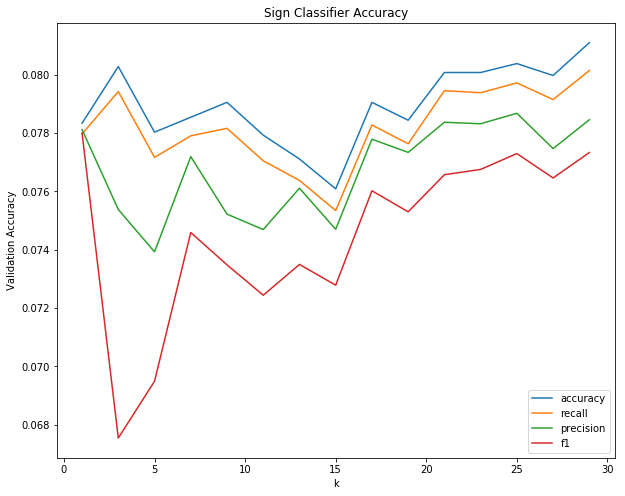

In [83]:
plotaccuracy(sign_k_list, sign_accuracies, sign_recalls, sign_precisions, sign_f1, "Sign Classifier Accuracy")

In [84]:
print(min(sign_prediction), max(sign_prediction))

1 12


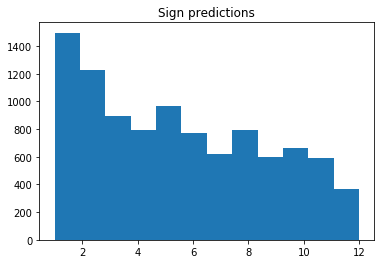

In [85]:
plt.hist(sign_prediction, bins=12)
plt.title("Sign predictions")
plt.show()

In [86]:
df_codes.kids_segment_code.value_counts()

0    35561
2    19466
1     4919
Name: kids_segment_code, dtype: int64

In [87]:
kids_prediction_data = df_codes[df_codes["kids_segment_code"] > 0]

In [88]:
kids_prediction_data.kids_segment_code.value_counts()

2    19466
1     4919
Name: kids_segment_code, dtype: int64

In [89]:
kids_prediction_features = kids_prediction_data.drop(["kids_segment_code"], axis=1)
kids_prediction_labels = kids_prediction_data["kids_segment_code"]

In [90]:
kids_k_list, kids_prediction, kids_accuracies, kids_recalls, kids_precisions, kids_f1 = knn(kids_prediction_features, kids_prediction_labels, 41, 'macro')

1 :  0.7855238876358417
3 :  0.8050030756612672
5 :  0.8195612056592168
7 :  0.8218166905884765
9 :  0.824892351855649
11 :  0.8263276604469961
13 :  0.8304285421365594
15 :  0.8310436743899938
17 :  0.8259175722780397
19 :  0.8267377486159524
21 :  0.8240721755177363
23 :  0.8259175722780397
25 :  0.8269427927004306
27 :  0.8257125281935617
29 :  0.8263276604469961
31 :  0.8257125281935617
33 :  0.827352880869387
35 :  0.8263276604469961
37 :  0.824892351855649
39 :  0.8263276604469961


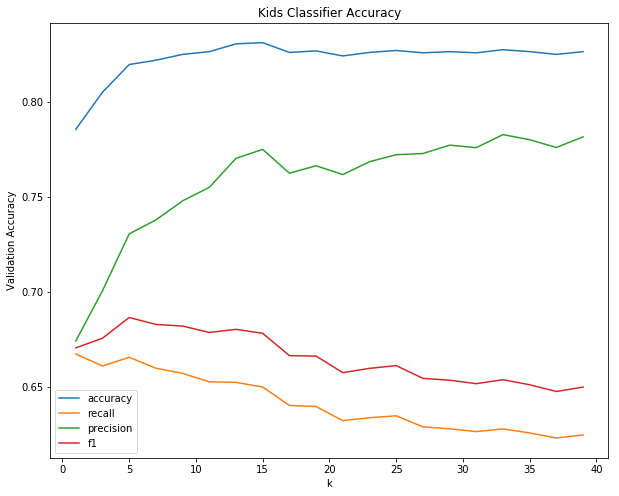

In [91]:
plotaccuracy(kids_k_list, kids_accuracies, kids_recalls, kids_precisions, kids_f1,"Kids Classifier Accuracy")

In [92]:
print(min(kids_prediction), max(kids_prediction))

1 2


In [93]:
print(kids_prediction)

[2 1 2 ... 2 2 2]


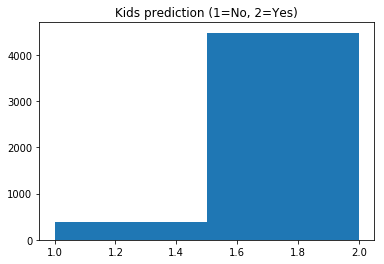

In [94]:
plt.hist(kids_prediction, bins=2)
plt.title("Kids prediction (1=No, 2=Yes)")
plt.show()

In [95]:
smokes_prediction_data = df_codes[df_codes["smokes_code"] > 0]

In [96]:
smokes_prediction_data.smokes_code.value_counts()

1    43896
3     3787
2     3040
5     2231
4     1480
Name: smokes_code, dtype: int64

In [97]:
smokes_prediction_features = smokes_prediction_data.drop(["smokes_code"], axis=1)
smokes_prediction_labels = smokes_prediction_data["smokes_code"]

In [98]:
smokes_k_list, smokes_prediction, smokes_accuracies, smokes_recalls, smokes_precisions, smokes_f1 = knn(smokes_prediction_features, smokes_prediction_labels, 15, 'macro')


1 :  0.68733351703867
3 :  0.787269220170846
5 :  0.7981996877009278
7 :  0.8027004684486084
9 :  0.8038027004684486
11 :  0.8052723431615688
13 :  0.8060990171764489


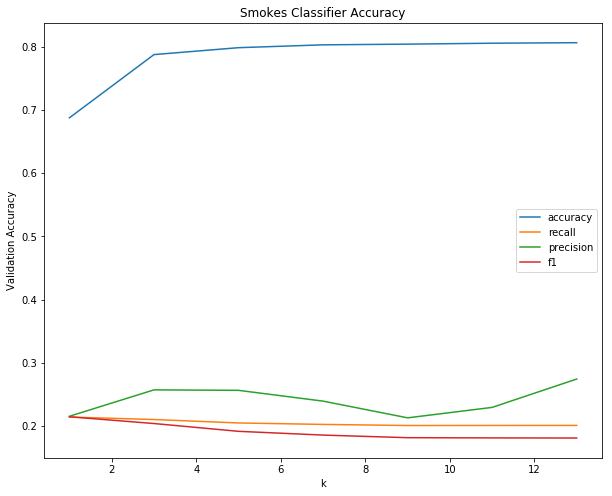

In [99]:
plotaccuracy(smokes_k_list, smokes_accuracies, smokes_recalls, smokes_precisions, smokes_f1,"Smokes Classifier Accuracy")

In [100]:
#print(min(smokes_prediction), max(smokes_prediction))

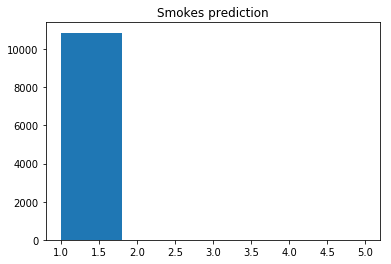

In [101]:
plt.hist(smokes_prediction, bins=5)
plt.title("Smokes prediction")
plt.show()

"1" (no smoker) always predicted. Accuracy is 80%, however, precision and recall are low.

In [114]:
#smokes_prediction_labels_bin.value_counts()

In [103]:
smokes_prediction_labels_bin = smokes_prediction_labels.apply(lambda x: 1 if x==1 else 2)

In [104]:
smokes_prediction_labels_bin.value_counts()

1    43896
2    10538
Name: smokes_code, dtype: int64

In [105]:
smokes_k_list, smokes_prediction, smokes_accuracies, smokes_recalls, smokes_precisions, smokes_f1 = knn(smokes_prediction_features, smokes_prediction_labels_bin, 31, 'binary')


1 :  0.7193900982823551
3 :  0.7628364103977221
5 :  0.7818499127399651
7 :  0.7908514742353265
9 :  0.7951685496463672
11 :  0.7988426563791678
13 :  0.8011389730871682
15 :  0.8026086157802884
17 :  0.8043538164783687
19 :  0.8043538164783687
21 :  0.8054560484982088
23 :  0.8048130798199687
25 :  0.8048130798199687
27 :  0.8059153118398089
29 :  0.8056397538348489


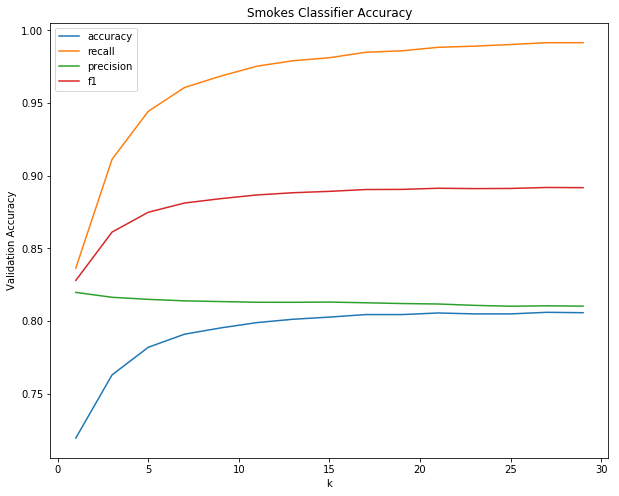

In [106]:
plotaccuracy(smokes_k_list, smokes_accuracies, smokes_recalls, smokes_precisions, smokes_f1,"Smokes Classifier Accuracy")

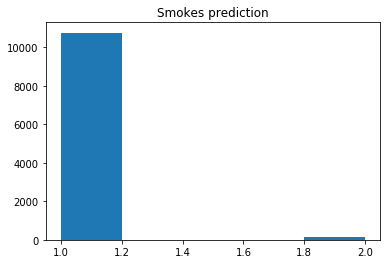

In [107]:
plt.hist(smokes_prediction, bins=5)
plt.title("Smokes prediction")
plt.show()

In [108]:
def SVC_lin(prediction_data, prediction_target):
    training_data, validation_data, training_labels, validation_labels = train_test_split(prediction_data, prediction_target, test_size = 0.2, random_state = 100)
    #print(len(training_data), len(training_labels))
    #print(len(validation_data), len(validation_labels))
    C_list = []
    accuracies = []
    recalls = []
    precisions = []
    f1s = []   
    for c in range(1, 2):
        c = c/100
        classifier = SVC(kernel="linear", C=c)
        classifier.fit(training_data, training_labels)
        print('C: ', c, ': ', classifier.score(validation_data, validation_labels))
        C_list.append(c)
        y_predict = classifier.predict(validation_data)
        accuracies.append(metrics.accuracy_score(validation_labels, y_predict))
        recalls.append(metrics.recall_score(validation_labels, y_predict, average='macro'))
        precisions.append(metrics.precision_score(validation_labels, y_predict, average='macro'))
        f1s.append(metrics.f1_score(validation_labels, y_predict, average='macro'))
    return C_list, y_predict, accuracies, recalls, precisions, f1s

In [109]:
def SVC_rbf(prediction_data, prediction_target):
    training_data, validation_data, training_labels, validation_labels = train_test_split(prediction_data, prediction_target, test_size = 0.2, random_state = 100)
    #print(len(training_data), len(training_labels))
    #print(len(validation_data), len(validation_labels))
    C_list = []
    accuracies = []
    recalls = []
    precisions = []
    f1s = []   
    for c in range(1, 2):
        c = c/100
        for gamma in range(1, 2):            
            gamma = gamma/10
            classifier = SVC(kernel = "rbf", gamma = gamma, C = c)
            classifier.fit(training_data, training_labels)
            print('C: ', c, ' gamma: ', gamma, ': ', classifier.score(validation_data, validation_labels))
            C_list.append(c)
            y_predict = classifier.predict(validation_data)
            accuracies.append(metrics.accuracy_score(validation_labels, y_predict))
            recalls.append(metrics.recall_score(validation_labels, y_predict, average='macro'))
            precisions.append(metrics.precision_score(validation_labels, y_predict, average='macro'))
            f1s.append(metrics.f1_score(validation_labels, y_predict, average='macro'))   
    return C_list, y_predict, accuracies, recalls, precisions, f1s

In [110]:
#The following code takes too long to run. Features dataset too large
#Clist_SVClin, y_predict_SVClin, kids_accuracies_SVClin, kids_recalls_SVClin, kids_precisions_SVClin, kids_f1_SVClin = SVC_lin(kids_prediction_features, kids_prediction_labels)

0.01 :  0.8335042034037318


In [217]:
#The following code takes too long to run. Features dataset too large
#Clist_SVC_rbf, y_predict_SVC_rbf, kids_accuracies_SVCrbf, kids_recalls_SVCrbf, kids_precisions_SVCrbf, kids_f1_SVCrbf = SVC_rbf(kids_prediction_features, kids_prediction_labels)

In [112]:
print("Accuracy: ", kids_accuracies_SVClin)
print("Recall: ", kids_recalls_SVClin)
print("Precision: ", kids_precisions_SVClin)
print("F1 score: ", kids_f1_SVClin)

Accuracy:  [0.8335042034037318]
Recall:  [0.6826629182179672]
Precision:  [0.761470949928071]
F1 score:  [0.7077728799291121]


In [113]:
print("Accuracy: ", kids_accuracies_SVCrbf)
print("Recall: ", kids_recalls_SVCrbf)
print("Precision: ", kids_precisions_SVCrbf)
print("F1 score: ", kids_f1_SVCrbf)

Accuracy:  [0.7898298134098831]
Recall:  [0.5]
Precision:  [0.39491490670494156]
F1 score:  [0.4412876618169321]


In [117]:
#Finding 4 features that correlate well with kids_segment_code
kids_prediction_data.corr().sort_values('kids_segment_code')['kids_segment_code']


age                     -0.525257
age_segment_code        -0.491336
sex_code                -0.071091
religion_segment_code   -0.054333
status_code             -0.040583
i_me_frequency          -0.021213
sign_code               -0.016467
body_type_code          -0.010101
income                  -0.006782
drugs_code              -0.001460
job_segment_code         0.003808
smokes_code              0.014740
text_length              0.023677
education_status_code    0.027630
height                   0.053736
orientation_code         0.058700
avg_word_length          0.065691
drinks_code              0.073213
education_level_code     0.080932
diet_type_code           0.086541
diet_strictness_code     0.092104
pets_segment_code        0.123261
kids_segment_code        1.000000
Name: kids_segment_code, dtype: float64

In [120]:
kids_prediction_features_small = kids_prediction_data[["age_segment_code", "sex_code", "pets_segment_code", "diet_strictness_code"]]



In [121]:
Clist_SVClin, y_predict_SVClin, kids_accuracies_SVClin, kids_recalls_SVClin, kids_precisions_SVClin, kids_f1_SVClin = SVC_lin(kids_prediction_features_small, kids_prediction_labels)

0.01 :  0.837605085093295


In [122]:
Clist_SVC_rbf, y_predict_SVC_rbf, kids_accuracies_SVCrbf, kids_recalls_SVCrbf, kids_precisions_SVCrbf, kids_f1_SVCrbf = SVC_rbf(kids_prediction_features_small, kids_prediction_labels)

C:  0.01  gamma:  0.1 :  0.837605085093295


In [123]:
print("Accuracy: ", kids_accuracies_SVClin)
print("Recall: ", kids_recalls_SVClin)
print("Precision: ", kids_precisions_SVClin)
print("F1 score: ", kids_f1_SVClin)

Accuracy:  [0.837605085093295]
Recall:  [0.6691488741990224]
Precision:  [0.7837857074262268]
F1 score:  [0.6990737047323206]


In [124]:
print("Accuracy: ", kids_accuracies_SVCrbf)
print("Recall: ", kids_recalls_SVCrbf)
print("Precision: ", kids_precisions_SVCrbf)
print("F1 score: ", kids_f1_SVCrbf)

Accuracy:  [0.837605085093295]
Recall:  [0.6691488741990224]
Precision:  [0.7837857074262268]
F1 score:  [0.6990737047323206]


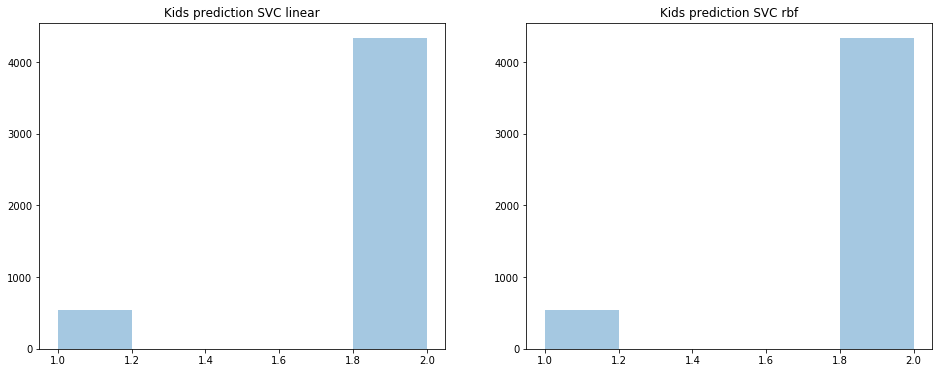

In [139]:
plt.figure(figsize=(16, 6))
plt.subplot(121)
plt.hist(y_predict_SVClin, bins=5, alpha=0.4)
plt.title("Kids prediction SVC linear")
plt.subplot(122)
plt.hist(y_predict_SVC_rbf, bins=5, alpha=0.4)
plt.title("Kids prediction SVC rbf")
plt.show()

### Regression

In [140]:
from sklearn.neighbors import KNeighborsRegressor

In [163]:
def knn_regressor(prediction_data, prediction_target, maxk):
    training_data, validation_data, training_labels, validation_labels = train_test_split(prediction_data, prediction_target, test_size = 0.2, random_state = 100)
    k_list = []
    accuracies = []
    r2s = []
    for k in range(1, maxk, 2):
        regressor = KNeighborsRegressor(n_neighbors = k, weights='distance')
        regressor.fit(training_data, training_labels)
        print(k, ': ', regressor.score(validation_data, validation_labels))
        k_list.append(k)
        y_predict = regressor.predict(validation_data)
        accuracies.append(regressor.score(validation_data, validation_labels))
        r2s.append(metrics.r2_score(validation_labels, y_predict))
    return k_list, y_predict, accuracies, r2s

In [142]:
df_codes.income.value_counts()

-1          48442
 20000       2952
 100000      1621
 80000       1111
 30000       1048
 40000       1005
 50000        975
 60000        736
 70000        707
 150000       631
 1000000      521
 250000       149
 500000        48
Name: income, dtype: int64

In [143]:
income_prediction_data = df_codes[df_codes["income"] > 0]

In [144]:
income_prediction_data.income.value_counts()

20000      2952
100000     1621
80000      1111
30000      1048
40000      1005
50000       975
60000       736
70000       707
150000      631
1000000     521
250000      149
500000       48
Name: income, dtype: int64

In [145]:
income_prediction_features = income_prediction_data[["text_length", "avg_word_length"]]
income_prediction_labels = income_prediction_data["income"]

In [164]:
k_list_income, y_predict_income, accuracies_income, r2_income = knn_regressor(income_prediction_features, income_prediction_labels, 41)


1 :  -0.8649188521206206
3 :  -0.3771793119358484
5 :  -0.2794282098948013
7 :  -0.2402410682280276
9 :  -0.22133192336222685
11 :  -0.20157428551101364
13 :  -0.1897858210103385
15 :  -0.1788751700492437
17 :  -0.17158103701985072
19 :  -0.16630353051026048
21 :  -0.16059184353228928
23 :  -0.1546505721317788
25 :  -0.1501118457845696
27 :  -0.1476064383995368
29 :  -0.1430316272469283
31 :  -0.14018547984268115
33 :  -0.13771187668575902
35 :  -0.13498413206635873
37 :  -0.13239621834358672
39 :  -0.13052538117510348


In [167]:
def plotaccuracy_regr(k_list, accuracies, r2, title):
    plt.figure(figsize=(10, 8))
    plt.plot(k_list, accuracies, label='accuracy')
#    plt.plot(k_list, r2, label='r2')
    plt.legend()
    plt.xlabel("k")
    plt.ylabel("Validation Accuracy")
    plt.title(title)
    plt.show()

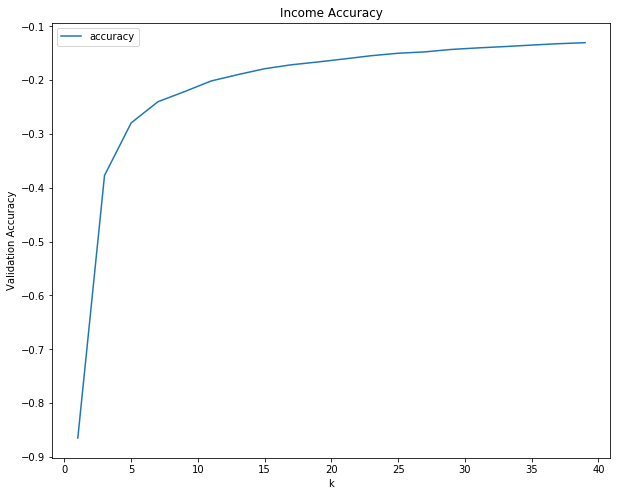

In [168]:
plotaccuracy_regr(k_list_income, accuracies_income, r2_income, "Income Accuracy")

In [169]:
df_codes.age.value_counts()

26     3724
27     3685
28     3583
25     3531
29     3295
24     3242
30     3149
31     2735
23     2592
32     2587
33     2206
22     1934
34     1902
35     1755
36     1583
37     1427
38     1330
21     1282
39     1172
42     1072
40     1030
41      980
20      953
43      858
44      708
45      643
19      611
46      578
47      529
48      481
49      459
50      437
51      350
52      344
18      309
56      271
54      267
55      265
57      256
53      252
59      221
58      197
60      195
61      176
62      167
63      138
64      113
65      109
66      105
67       66
68       59
69       31
110       1
109       1
Name: age, dtype: int64

In [204]:
age_prediction_data = df_codes[df_codes["age"] < 100] #Removing outliers

In [205]:
#age_prediction_data = normalize_data(age_prediction_data)

In [206]:
age_prediction_features = age_prediction_data[["i_me_frequency"]]
age_prediction_labels = age_prediction_data["age"]

In [207]:
k_list_age, y_predict_age, accuracies_age, r2_age = knn_regressor(age_prediction_features, age_prediction_labels, 41)


1 :  -1.0133106233947844
3 :  -0.37178030723334743
5 :  -0.2617805697552906
7 :  -0.2347909486259332
9 :  -0.20217862609754866
11 :  -0.194035452414836
13 :  -0.18246033326040179
15 :  -0.1724994173646146
17 :  -0.16578558912551955
19 :  -0.1621350687111831
21 :  -0.15845885497310097
23 :  -0.1580635675006301
25 :  -0.1564757546666471
27 :  -0.15841728337141592
29 :  -0.16033554951117135
31 :  -0.1605647014499303
33 :  -0.1614278856315816
35 :  -0.15775653500520215
37 :  -0.15835681585081307
39 :  -0.1594069329037906


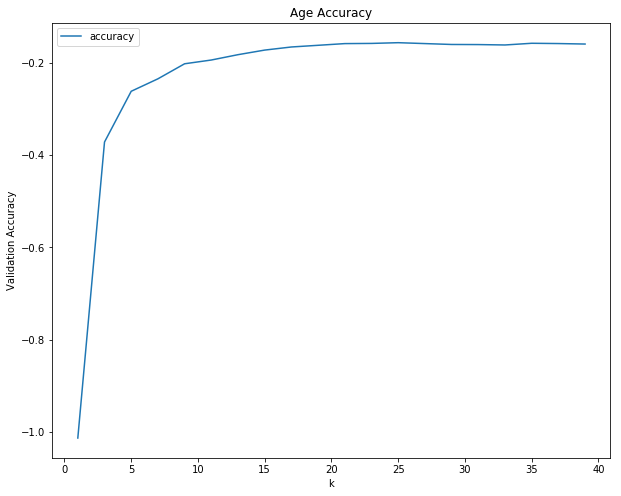

In [208]:
plotaccuracy_regr(k_list_age, accuracies_age, r2_age, "Age Accuracy")

In [209]:
from sklearn.linear_model import LinearRegression

In [210]:
def linregr(x, y):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=100)
    mlr = LinearRegression()
    model = mlr.fit(x_train, y_train)
    y_predict = mlr.predict(x_test)
    print("Train score:")
    print(mlr.score(x_train, y_train))
    print("Test score:")
    print(mlr.score(x_test, y_test))
    return y_test, y_predict

In [211]:
y_test_income, y_predict_income = linregr(income_prediction_features, income_prediction_labels)

Train score:
0.0021804643191750683
Test score:
0.001183747903015786


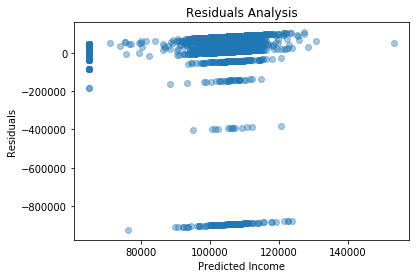

In [212]:
residuals = y_predict_income - y_test_income

plt.scatter(y_predict_income, residuals, alpha=0.4)
plt.title('Residuals Analysis')
plt.xlabel("Predicted Income")
plt.ylabel("Residuals")
plt.show()

In [213]:
y_test_age, y_predict_age = linregr(age_prediction_features, age_prediction_labels)

Train score:
0.003647532104498641
Test score:
0.0034674981650129055


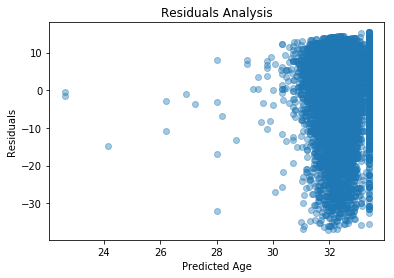

In [214]:
residuals = y_predict_age - y_test_age

plt.scatter(y_predict_age, residuals, alpha=0.4)
plt.title('Residuals Analysis')
plt.xlabel("Predicted Age")
plt.ylabel("Residuals")
plt.show()

We observe that predicted age is nearly always between 30 and 34 years. Residuals (predicted - actual) is between -40 (actual age much higher than predicted) and 15 (actual age lower than predicted. The accuracy of the prediction is very low.

In [218]:
age_segment_prediction_data = df_codes

In [221]:
age_segment_prediction_data.columns

Index(['age', 'height', 'income', 'age_segment_code', 'body_type_code',
       'diet_strictness_code', 'diet_type_code', 'drinks_code', 'smokes_code',
       'drugs_code', 'education_level_code', 'education_status_code',
       'job_segment_code', 'kids_segment_code', 'orientation_code',
       'pets_segment_code', 'religion_segment_code', 'sex_code', 'sign_code',
       'status_code', 'text_length', 'avg_word_length', 'i_me_frequency'],
      dtype='object')

In [224]:
age_segment_prediction_data.age_segment_code.value_counts()

2    21060
3    19846
1     7372
4     7338
5     2860
6     1159
0      309
7        2
Name: age_segment_code, dtype: int64

In [225]:
age_segment_prediction_labels = age_segment_prediction_data['age_segment_code']
age_segment_prediction_features = age_segment_prediction_data.drop(["age", "age_segment_code"], axis=1)

In [226]:
age_segment_k_list, age_segment_prediction, age_segment_accuracies, age_segment_recalls, age_segment_precisions, age_segment_f1 = knn(age_segment_prediction_features, age_segment_prediction_labels, 41, 'macro')


1 :  0.28582151793160965
3 :  0.29849874895746453
5 :  0.3276897414512093
7 :  0.332860717264387
9 :  0.34236864053377813


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


11 :  0.3448707256046706


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


13 :  0.3530442035029191


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


15 :  0.35704753961634694


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


17 :  0.35696413678065053


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


19 :  0.35988323603002503


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


21 :  0.36088407005838197


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


23 :  0.3628023352793995


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


25 :  0.3642201834862385


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


27 :  0.3678065054211843


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


29 :  0.3664720600500417


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


31 :  0.36430358632193494


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


33 :  0.36455379482902417


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


35 :  0.36246872393661383


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


37 :  0.3628023352793995


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


39 :  0.36430358632193494


/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Volumes/Macintosh_HD/Python/miniconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


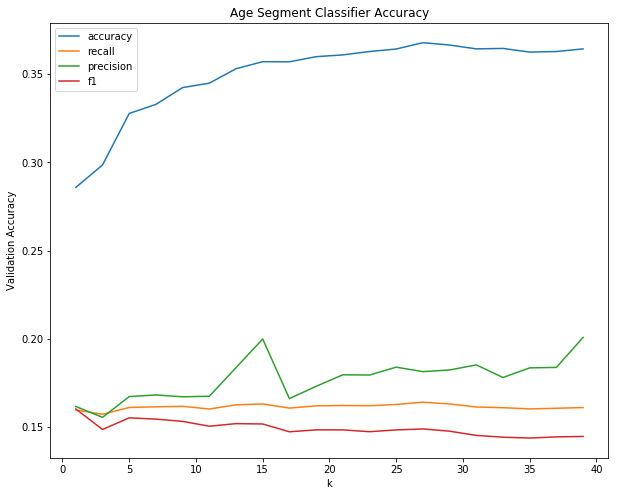

In [227]:
plotaccuracy(age_segment_k_list, age_segment_accuracies, age_segment_recalls, age_segment_precisions, age_segment_f1,"Age Segment Classifier Accuracy")